In [1]:
import numpy as np
#import pandas as pd
from datascience import *

import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline  

https://www.kaggle.com/datasets/joebeachcapital/fast-food/
https://www.kaggle.com/datasets/iamsouravbanerjee/top-50-fastfood-chains-in-usa
https://www.kaggle.com/datasets/vittoriogiatti/bigmacprice

What makes a fast food restaurant popular? Healthiness (or lack there of)? Price? Abundantcy?
Let's start off with Healthiness. What is the healthiest Fast Food Resteraunt? Or least Healthiest?

In [2]:
MCprice = Table.read_table("McDonalds Prices.csv")
AMP= Table.read_table("Average Menu Price.csv")
AMP2 = Table.read_table("Average Menu Prices2.csv")
FFNM = Table.read_table("FastFoodNutritionMenuV6.csv")
Top50 = Table.read_table("Top 50 Fast-Food Chains in USA.csv")

In [3]:
FFNM

Company,Item,Calories,Calories from Fat,Total Fat,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbs,Fiber,Sugars,Protein,Weight Watchers Pnts
McDonald’s,Hamburger,250,80,9,3.5,0.5,25,520,31,2,6,12,247.5
McDonald’s,Cheeseburger,300,110,12,6,0.5,40,750,33,2,6,15,297
McDonald’s,Double Cheeseburger,440,210,23,11,1.5,80,1150,34,2,7,25,433
McDonald’s,McDouble,390,170,19,8,1,65,920,33,2,7,22,383
McDonald’s,Quarter Pounder® with Cheese,510,230,26,12,1.5,90,1190,40,3,9,29,502
McDonald’s,Double Quarter Pounder® with Cheese,740,380,42,19,2.5,155,1380,40,3,9,48,720
McDonald’s,Big Mac®,540,260,29,10,1.5,75,1040,45,3,9,25,534
McDonald’s,Big N’ Tasty®,460,220,24,8,1.5,70,720,37,3,8,24,452
McDonald’s,Big N’ Tasty® with Cheese,510,250,28,11,1.5,85,960,38,3,8,27,502
McDonald’s,Angus Bacon & Cheese,790,350,39,17,2,145,2070,63,4,13,45,775


In [4]:
Mcdonalds = FFNM.where('Company', "McDonald’s")
McdonaldsCalAvg=(sum(Mcdonalds.column("Calories").astype(int))/Mcdonalds.num_rows)
McdonaldsTFAvg=(sum(Mcdonalds.column("Trans Fat").astype(float))/Mcdonalds.num_rows)
McdonaldsCalAvg
McdonaldsTFAvg

0.19359756097560976

In [5]:
TacoBell=FFNM.where('Company', "Taco Bell")
TacoBellCalAvg=(sum(TacoBell.column("Calories").astype(int))/TacoBell.num_rows)
TacoBellTFAvg=(sum(TacoBell.column("Trans Fat").astype(float))/TacoBell.num_rows)
TacoBellCalAvg

292.16666666666669

In [6]:
PizzaHut=FFNM.where('Company', "Pizza Hut")
PizzaHutCalAvg=(sum(PizzaHut.column("Calories").astype(int))/PizzaHut.num_rows)
PizzaHutTFAvg=(sum(PizzaHut.column("Trans Fat").astype(float))/PizzaHut.num_rows)
PizzaHutCalAvg

253.37837837837839

In [7]:
KFC=FFNM.where('Company', "KFC")
KFCCalAvg=(sum(KFC.column("Calories").astype(int))/KFC.num_rows)
KFCTFAvg=(sum(KFC.column("Trans Fat").astype(float))/KFC.num_rows)
KFCCalAvg

215.22935779816513

In [8]:
Wendys= FFNM.where('Company', "Wendy’s")
WendysCalAvg=(sum(Wendys.column("Calories").astype(int))/Wendys.num_rows)
WendysTFAvg=(sum(Wendys.column("Trans Fat").astype(float))/Wendys.num_rows)
WendysCalAvg

322.5

In [9]:
BurgerKing = FFNM.where('Company', "Burger King")
BurgerKingCalAvg = (sum(BurgerKing.column("Calories").astype(int))/BurgerKing.num_rows)
BurgerKingTFAvg=(sum(BurgerKing.column("Trans Fat").astype(float))/BurgerKing.num_rows)
BurgerKingCalAvg

359.18994413407819

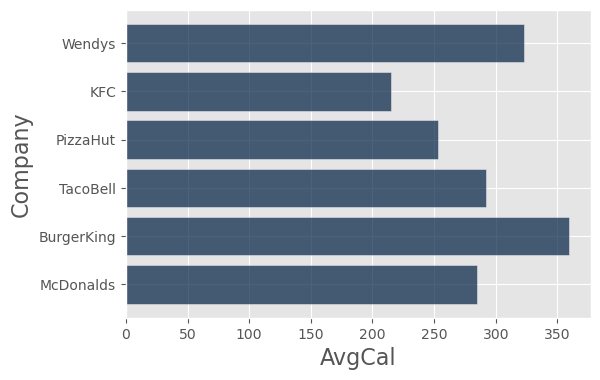

In [10]:
CalAvg = Table(make_array('Company', 'AvgCal'))
CalAvg = CalAvg.with_rows(make_array(
    make_array('Wendys', float(WendysCalAvg)),
    make_array('KFC', float(KFCCalAvg)),
    make_array('PizzaHut', float(PizzaHutCalAvg)),
    make_array('TacoBell', float(TacoBellCalAvg)),
    make_array('BurgerKing', float(BurgerKingCalAvg)),
    make_array('McDonalds', float(McdonaldsCalAvg))))
CalAvg['Company']=CalAvg['Company'].astype(str)
CalAvg['AvgCal']=CalAvg['AvgCal'].astype(float)
CalAvg.barh('Company')
                        

Looks like Calories wise, BurgerKing is the least Healthiest and KFC is the healthiest.

But Calories aren't inherently bad. Transfat is, let's take a look at that.

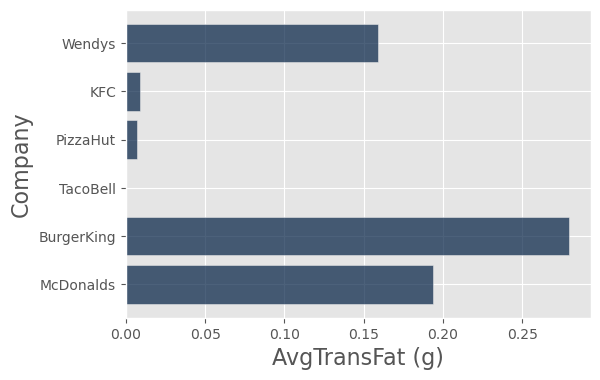

In [11]:
TFAvg = Table(make_array('Company', 'AvgTransFat (g)'))
TFAvg = TFAvg.with_rows(make_array(
    make_array('Wendys', float(WendysTFAvg)),
    make_array('KFC', float(KFCTFAvg)),
    make_array('PizzaHut', float(PizzaHutTFAvg)),
    make_array('TacoBell', float(TacoBellTFAvg)),
    make_array('BurgerKing', float(BurgerKingTFAvg)),
    make_array('McDonalds', float(McdonaldsTFAvg))))
TFAvg['Company']=TFAvg['Company'].astype(str)
TFAvg['AvgTransFat (g)']=TFAvg['AvgTransFat (g)'].astype(float)
TFAvg.barh('Company')
                        

From the graph, it can be inferred that Burger King, Mcdonalds, and Wendys are less healthy than KFC, Taco Bell, and Pizza Hut. Due to the amount of TransFat in their food.

In [12]:
Top50

Fast-Food Chains,U.S. Systemwide Sales (Millions - U.S Dollars),Average Sales per Unit (Thousands - U.S Dollars),Franchised Stores,Company Stores,2021 Total Units,Total Change in Units from 2020
Arby’s,4462,1309,2293,1116,3409,40
Baskin-Robbins,686,296,2317,0,2317,102
Bojangles,1485,1924,496,277,773,15
Burger King,10033,1470,7054,51,7105,24
Carl’s Jr.,1560,1400,1011,47,1058,-21
Checkers/Rally’s,931,1145,568,266,834,-13
Chick-fil-A,16700,6100,2650,82,2732,155
Chipotle,7547,2641,0,2966,2966,198
Church’s Chicken,776,870,731,161,892,-13
Culver’s,2489,3099,831,6,837,55


In [13]:
TopMCD = Top50.where('Fast-Food Chains', 'McDonald’s')
MDTotal = TopMCD.column('2021 Total Units')
MDSales = TopMCD.column('U.S. Systemwide Sales (Millions - U.S Dollars)')
TopKFC = Top50.where('Fast-Food Chains', 'KFC')
KFCTotal = TopKFC.column('2021 Total Units')
KFCSales = TopKFC.column('U.S. Systemwide Sales (Millions - U.S Dollars)')
TopBK = Top50.where('Fast-Food Chains', 'Burger King')
BKTotal = TopBK.column('2021 Total Units')
BKSales = TopBK.column('U.S. Systemwide Sales (Millions - U.S Dollars)')
TopWNDY = Top50.where('Fast-Food Chains', 'Wendy\'s')
WNDYTotal = TopWNDY.column('2021 Total Units')
WNDYSales = TopWNDY.column('U.S. Systemwide Sales (Millions - U.S Dollars)')
TopPH = Top50.where('Fast-Food Chains', 'Pizza Hut')
PHTotal = TopPH.column('2021 Total Units')
PHSales = TopPH.column('U.S. Systemwide Sales (Millions - U.S Dollars)')
TopTB = Top50.where('Fast-Food Chains', 'Taco Bell')
TBTotal = TopTB.column('2021 Total Units')
TBSales = TopTB.column('U.S. Systemwide Sales (Millions - U.S Dollars)')

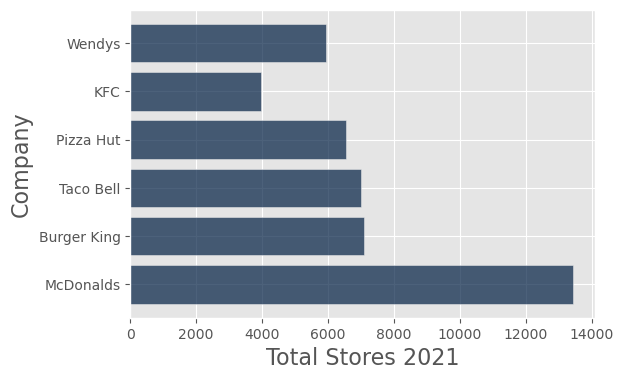

In [14]:
TotalUnits = Table(make_array('Company', 'Total Stores 2021'))
TotalUnits = TotalUnits.with_rows(make_array(
    make_array('Wendys', float(WNDYTotal)),
    make_array('KFC', float(KFCTotal)),
    make_array('Pizza Hut', float(PHTotal)),
    make_array('Taco Bell', float(TBTotal)),
    make_array('Burger King', float(BKTotal)),
    make_array('McDonalds', float(MDTotal))))
TotalUnits['Company']=TotalUnits['Company'].astype(str)
TotalUnits['Total Stores 2021']=TotalUnits['Total Stores 2021'].astype(float)
TotalUnits.barh('Company')

This Graph shows how abundant each company is. Mcdonalds is leading by a very high amount.

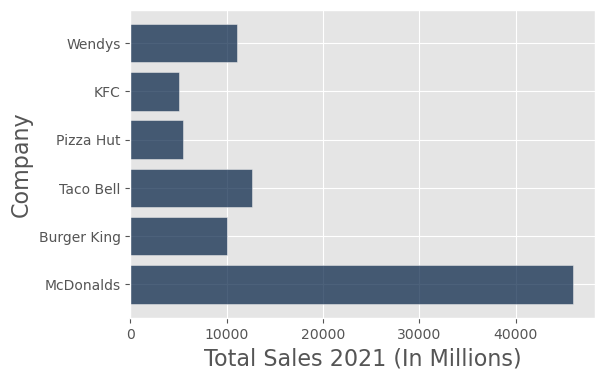

In [15]:
TotalSales = Table(make_array('Company', 'Total Sales 2021 (In Millions)'))
TotalSales = TotalSales.with_rows(make_array(
    make_array('Wendys', float(WNDYSales)),
    make_array('KFC', float(KFCSales)),
    make_array('Pizza Hut', float(PHSales)),
    make_array('Taco Bell', float(TBSales)),
    make_array('Burger King', float(BKSales)),
    make_array('McDonalds', float(MDSales))))
TotalSales['Company']=TotalSales['Company'].astype(str)
TotalSales['Total Sales 2021 (In Millions)']=TotalSales['Total Sales 2021 (In Millions)'].astype(float)
TotalSales.barh('Company')

This graph shows Mcdonalds leading in Sales by a very high amount.

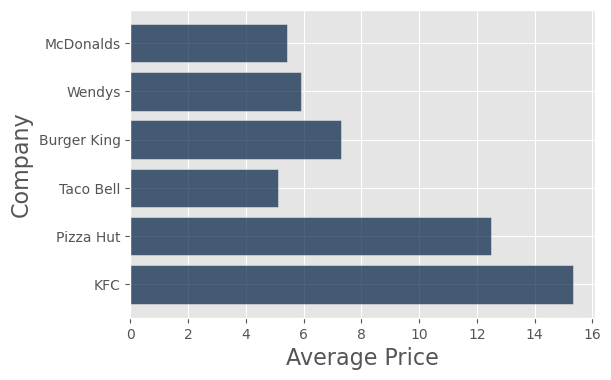

In [16]:
AMP.barh("Company")

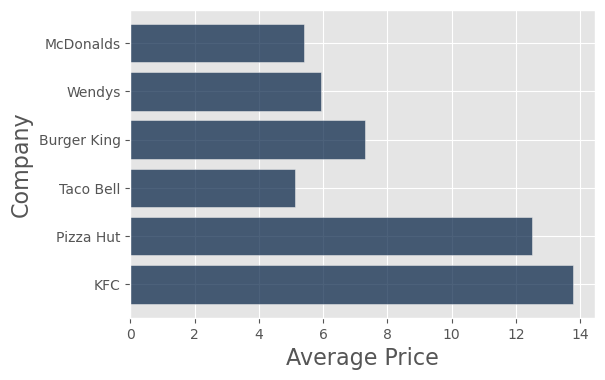

In [17]:
AMP2.barh("Company")